In [44]:
import pandas as pd  
import numpy as np  
from funcs import *
import matplotlib.pyplot as plt  

import seaborn as seabornInstance 
#from sklearn.model_selection import train_test_split 
#from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

### Import data

In [45]:
#data = pd.concat([X, y_recovered, y_deaths, y_recovered_smoothed, y_deaths_smoothed], axis=1)

In [46]:
#Number of infected for past two weeks
X = pd.read_csv('data.csv').iloc[:,1:-2].values

#Number of recovered with transformation to smooth data
y_rec_smoothed = pd.read_csv('data.csv').iloc[:,-1].values

In [47]:
"""# ignore last two elements because they are equal to zero
y_rec_smoothed = y_rec_smoothed[:-2]
X = X[:-2,:]"""

'# ignore last two elements because they are equal to zero\ny_rec_smoothed = y_rec_smoothed[:-2]\nX = X[:-2,:]'

# Smoothing

All different smoothing that I have tried:
- simple exponential smoothing: smaller error:0.19
-

### Simple Exponential Smoothing

In [48]:
find_best_alpha(X, y_rec_smoothed, X.shape[1], model='simple')

(0.95, 0.9783338147895113)

In [49]:
find_best_alpha(X, y_rec_smoothed, X.shape[1], model='simple', with_validation=False)

(0.0, 0.9682673724841392)

In [50]:
X.shape

(93, 15)

### Exponential Smoothing

In [51]:
find_best_alpha(X, y_rec_smoothed, X.shape[1], model='non-simple', K=1)

(0.7, 0.9643796929088102)

In [9]:
find_best_alpha(X, y_rec_smoothed, X.shape[1], model='non-simple', K=1, with_validation=False)

(0.0, 0.5744738060570448)

In [10]:
find_best_alpha(X, y_rec_smoothed, X.shape[1], model='non-simple', K=2)

(0.0, 1.2155465442589208)

In [11]:
find_best_alpha(X, y_rec_smoothed, X.shape[1], model='non-simple', K=2, with_validation=False)

(0.0, 0.5744738060570448)

In [12]:
find_best_alpha(X, y_rec_smoothed, X.shape[1], model='non-simple', K=3)

(0.0, 1.2155465442589208)

In [13]:
find_best_alpha(X, y_rec_smoothed, X.shape[1], model='non-simple', K=3, with_validation=False)

(0.0, 0.5744738060570448)

In [14]:
find_best_alpha(X, y_rec_smoothed, X.shape[1], model='non-simple', K=4)

(0.0, 1.2155465442589204)

In [15]:
find_best_alpha(X, y_rec_smoothed, X.shape[1], model='non-simple', K=4, with_validation=False)

(0.0, 0.5744738060570448)

In [16]:
find_best_alpha(X, y_rec_smoothed, X.shape[1], model='non-simple', K=5)

(0.0, 1.2155465442589208)

In [17]:
find_best_alpha(X, y_rec_smoothed, X.shape[1], model='non-simple', K=5, with_validation=False)

(0.0, 0.5744738060570247)

In [18]:
find_best_alpha(X, y_rec_smoothed, X.shape[1], model='non-simple', K=6)

(0.0, 1.2155465442589208)

In [19]:
find_best_alpha(X, y_rec_smoothed, X.shape[1], model='non-simple', K=6, with_validation=False)

(0.0, 0.5744738060570448)

### Gaussian Smoothing

Find optimum K for gaussian smoothing

In [20]:
find_best_K(X, y_rec_smoothed, 'even')

(10, 1.196361395080383)

In [21]:
find_best_K(X, y_rec_smoothed, 'even', with_validation=False)

(10, 0.5671010150384752)

Find optimum K for gaussian smoothing, odd

In [22]:
find_best_K(X, y_rec_smoothed, 'odd')

(2, 1.2336636802350394)

In [23]:
find_best_K(X, y_rec_smoothed, 'odd', with_validation=False)

(0, 0.40820322682318655)

## Quadratic Regularization

In [34]:
X = apply_smoothing(X, 0, 'odd')

In [35]:
N = X.shape[1]

To do:
- Create matrix M
- Create matrix X (DONE)
- Compute X^TX
- Compute M^TM
- Verify M^TM value, if it coincides with the one G.O. wrote in report
- install library, define instances, run optimizer

In [36]:
# ----------------------------#
#        GENERATE PREDICTIONS 
# ----------------------------#

pct_90 = int(np.ceil(90*len(X)/100))
pct_80 = int(np.ceil(80*len(X)/100))
pct_70 = int(np.ceil(70*len(X)/100))

X_train, X_test = X[:pct_80], X[pct_80:]
y_train, y_test =y_rec_smoothed[:pct_80], y_rec_smoothed[pct_80:]


index = find_best_index(X_train, y_train, X_test, y_test, 'maape', N)
P, q, G, h = generate_params(X_train, y_train, index, N)
gamma = cvxopt_solve_qp(P, q, G, h)
y_pred = X_test@gamma

In [37]:
gamma

array([0.00574815, 0.00574825, 0.00574836, 0.00574846, 0.00574856,
       0.00574866, 0.00574876, 0.00574886, 0.00574896, 0.00574906,
       0.00574916, 0.00574926, 0.00574937, 0.0057495 , 0.00575109])

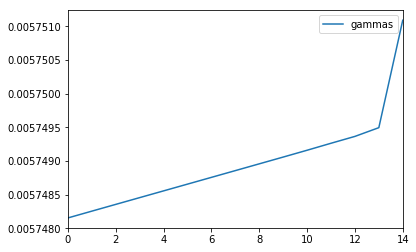

In [38]:
pd.DataFrame({'gammas': gamma}).plot()

In [39]:
index

14

In [40]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
#df


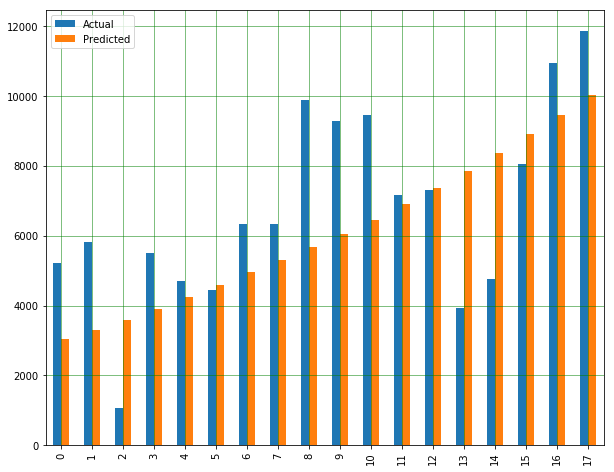

In [41]:
df.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [42]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute percentage error:', mape(y_test, y_pred))  
print('Mean Square percentage error:', mspe(y_test, y_pred))  






Mean Absolute Error: 1906.5100309422658
Mean Squared Error: 5303958.3128638305
Root Mean Squared Error: 2303.032416806987
Mean Absolute percentage error: 0.4082032268231865
Mean Square percentage error: 0.4641941518133842


## Cross Validation

### Advancement validation

In [43]:
print('for each split we have the following MAPE losses: {}, \nResulting in a mean MAAPE of {}'.format(advancement_val(X, y_rec_smoothed)[0],advancement_val(X, y_rec_smoothed)[1]))


for each split we have the following MAPE losses: [0.9976486060618595, 3.7877364426795586, 0.5523768861170031, 0.5522372822383791, 0.3452955917345459], 
Resulting in a mean MAAPE of 1.2470589617662688


# Find best hyperparameter $\lambda$

In [93]:
# this is the function we want to minimize
# we want to minimize the mean loss function MAE from our cross validation run
def f(lambda_):
    mapes, maes, y_vals, y_preds = cross_val(splits_X, splits_y, lambda_)
    return np.mean(maes)   

In [94]:
from scipy.optimize import minimize

minimize(f,1.0,method='SLSQP')

In [95]:
from skopt import gp_minimize
from skopt.space import Real, Integer

space  = [Real(10**-5, 10**0, name='learning_rate')]

res = gp_minimize(f,space)
lambda_ = res['x'][0]

In [96]:
def plot_loss_per_lambda():
    lambdas = [-10,-1,0, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 1, 10]
    mapes = []
    for l in lambdas:
        X_train = X_4[:pct_80]
        X_test = X_4[pct_80:]
        y_train = y_recovered[:pct_80]
        y_test = y_recovered[pct_80:]
        #print(X_test@gamma)
        #print(y_test)
        index = find_best_k(X_train, y_train, X_test, y_test, 'mape')
        P, q, G, h = generate_params(X_train, y_train, index,l)
        gamma = cvxopt_solve_qp(P, q, G, h)
        y_pred = X_test@gamma
        mapes.append(format(100*mape(y_test, y_pred),'.20'))
    print(mapes)
    print(len(mapes) == len(np.unique(mapes)))
    lambdas1 = ['-10','-1','0','10e-5', '10e-4', '10e-3', '10e-2', '10e-1', '1', '10']
    plt.plot(lambdas1, mapes, 'b')
        #plt.xlabel('Day')
        #plt.ylabel('Number of Daily Recovered')
        #plt.legend(['Predicted value','True value'])
        #plt.title('Baseline Prediction model for k=' + str(k))
        #plt.axvline(x=pct_80-1)

    

In [97]:
plot_loss_per_lambda()

In [98]:
def plot_gammas_per_lambda():
    lambdas = [-10, -1, 0, 10e-5, 10e-4, 10e-3, 10e-2, 10e-1, 1, 10]
    gammas = []
    for l in lambdas:
        X_train = X_4[:pct_80]
        X_test = X_4[pct_80:]
        y_train = y_recovered[:pct_80]
        y_test = y_recovered[pct_80:]
        #print(X_test@gamma)
        #print(y_test)
        index = find_best_k(X_train, y_train, X_test, y_test, 'mape')
        P, q, G, h = generate_params(X_train, y_train, index,l)
        gamma = cvxopt_solve_qp(P, q, G, h)
        y_pred = X_test@gamma
        gammas.append(format(np.mean(gamma), '.20f'))
    print(gammas)
    lambdas1 = ['-10','-1','0','10e-5', '10e-4', '10e-3', '10e-2', '10e-1', '1', '10']

    plt.plot(lambdas1, gammas, 'b')
        #plt.xlabel('Day')
        #plt.ylabel('Number of Daily Recovered')
        #plt.legend(['Predicted value','True value'])
        #plt.title('Baseline Prediction model for k=' + str(k))
        #plt.axvline(x=pct_80-1)

    

In [99]:
plot_gammas_per_lambda()